# Prototype data generation

In this notebook we will layout an example workflow that can be used with the prototype cubing engine which is the endgoal of MS19 in the BmD project. 

## Setup

In order to utilize the modules that were written for this project we will add the path temporarily to the environment so that we will not need to do a setup

In [9]:
import sys
import os

# Get the path to src/ relative to this notebook
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

# Add to Python path if not already there
if src_path not in sys.path:
    sys.path.insert(0, src_path)

## Prototype Area of interest

For the prototype we will look at one of the Natura2000 sites in Belgium, the Sonian Forest and the surrounding sites. In the W3 T1 documentation for the BmD project a complete description of this area is given but we will provide a short overview in this notebook as well.

<div style="float: right; width: 50%; margin-left: 15px; text-align: center;">
  <img src="img/AOI.png" alt="Sonian Forest" style="width:100%;">
  <div style="font-size: 90%; color: gray; margin-top: 4px;">
    <em>Figure 1:</em> Sonian Forest and its surrounding Natura2000 areas
  </div>
</div>

<p>
  The Sonian Forest and its surrounding areas are characterized by a set of habitats, which can be found on the 
  <a href="https://natura2000.eea.europa.eu/" target="_blank">Natura2000</a> website. The areas of interest are characterized by:
</p>

<ol>
  <li>
    <strong>La Forêt de Soignes avec lisières et domaines boisés avoisinants et la Vallée de la Woluwe</strong> – 
    <em>complexe Forêt de Soignes - Vallée de la Woluwe</em>
    <ul>
      <li><strong>Area code:</strong> BE1000001</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 5 species & 8 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Sonian Forest</strong>
    <ul>
      <li><strong>Area code:</strong> BE2400008</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 3 species & 9 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Vallées de l'Argentine et de la Lasne</strong>
    <ul>
      <li><strong>Area code:</strong> BE31002C0</li>
      <li><strong>Protected under:</strong> both Birds and Habitats Directives</li>
      <li><strong>Area:</strong> 821.45 ha</li>
      <li><strong>Protected:</strong> 16 species & 14 habitats</li>
    </ul>
  </li>
</ol>
<p>
  Each habitat is characterized by a set of species that are indicative of its health. In total there are 
  <strong>211 species of interest</strong> for this area, which are described within the file 
  <code>prototypeNames.csv</code> located in the prototype script directory under the 
  <code>inp</code> folder.
</p>

<p>
  In addition to this, we also provide a file containing the invasive species that are known within the country. 
  This list, the <em>Global Register of Introduced and Invasive Species - Belgium</em>, can be found on 
  <a href="https://www.gbif.org/dataset/6d9e952f-948c-4483-9807-575348147c7e" target="_blank">GBIF</a> and is 
  accessible as a dataset containing a Darwin Core (DwC) archive.
</p>

In [2]:
#Bbox formatted with long_min, lat_min, long_max, lat_max for the areas of interest
aoi_bbox = (4.171371,50.684060,4.743004,50.877911)
#Path and filename to the species of interest
species_oi_path = "inp"
species_oi_file = "prototypeNames.csv"
#Path and filename to the invasive species
species_inv_path = "inp/dwca-unified-checklist-v1.14"
species_inv_file = "taxon.txt"

## GBIF 

### GBIF data gathering

In this section we will use the functions described in 'src\datasource\gbif.py' to obtain relevant biodiversity data

In [3]:
from datasource.gbif import gbif_sql

INFO:Note: NumExpr detected 22 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:NumExpr defaulting to 16 threads.


In [4]:
species_oi_df, mismatch_oi_df = gbif_sql.fetch_taxon_info(species_oi_file, 
                                                         inp_path=species_oi_path,
                                                         out_file="species_oi.csv",
                                                         out_path="out",
                                                         mismatch_file="species_mm.csv",
                                                         keep_higherrank=False)
species_oi_keys = species_oi_df["acceptedUsageKey"].values

'NONE' and 'HIGHERRANK' matches encountered while searching through the GBIF taxonomic backbone:
The following lookup names (Carex sp., Lathyrus montanus, Chara sp, Ranunculus nemorosus, Salix alba, Lotus uliginosus, Picea abie) resulted in 'NONE' or 'HIGHERRANK' type match. Potential reasons can be found in the mismatch_df under the key 'note'


C:\Users\niels\Documents\Repositories\BmC\src\datasource\gbif\gbif_sql.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxonomic_df["acceptedUsageKey"].fillna(taxonomic_df["usageKey"], inplace=True)


In [5]:
species_oi_keys

array([ 2914547,  3113784,  7502456,  6027388,  3923253,  2481119,
        3135329,  5275012,  2481819,  2891147,  9118014,  2874027,
        5331258,  2650133,  2685484,  2926557,  2787993,  2723315,
        2926683,  8397184,  5304283,  3133702,  3033665,  9444556,
        2673408,  5371874,  5410564,  5329192,  3033266,  5289877,
        2727917,  2704505,  5334277,  2739622,  2882316,  3085811,
        2701418,  2914642,  5365576,  3085424,  5371781,  3189172,
        3039454,  5341478,  2360842,  2480726,  5369701,  3054168,
        2671130,  2704211,  5386897,  5365496,  3029627,  3033263,
        5366922,  2480910,  5301213,  2882482,  2729081,  5290194,
        9490132,  2882833,  5388835,  2756540,  5371889,  4149465,
        5314725,  2878688,  2890668,  5405976,  9213153,  7277865,
        2681729,  7960979,  2477872,  3190715,  3113650,  5385604,
        2888808,  2724609,  5333408,  2702717,  5384795,  3191374,
        7883344,  5664390,  7702019,  2676091,  2493129,  5371

In [8]:
len(species_oi_keys)

204

In [7]:
gbif_sql.generate_json_query(species_oi_keys, aoi_bbox, 1980, 2020,
                            out_file="gbif_oi_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])

In [12]:
species_inv_keys = [int(key) for key in  gbif_sql.extract_keys_dwc("invasiveNames.txt", "inp")]

In [13]:
gbif_sql.generate_json_query(species_inv_keys, aoi_bbox, 
                            out_file="gbif_inv_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])

Executing this code will generate .json file that will be stored within the current working directory. This json file can subsequently be used to call the GBIF SQL API through the gbifCube.sh bash script. 
1) Assure that the bash script has the correct permission to be execute from the shell. To check whether the file has the correct permission to execute use the `ls -l gbifCube.sh` command in the shell. If the file has execution permission it should have the `x` character. If the script does not have the right permission on your system use the `chmod +x gbifCube.sh` in your shell
2) In order to run this bash script, GBIF credentials should be added to the `~/.bashrc`
```
EXPORT GBIF_USERNAME = "yourUserName"
EXPORT GBIF_EMAIL = "yourAccountEmail"
EXPORT GBIF_PASSWORD = "yourPassword"
```
3) Execution of the `gbifCube.sh` script will return a message that ends in multidigit string. This multidigit string should subsequently be used to download the files

### GBIF data exploration

In this section we will perform exploration of the queried data obtained from GBIF to determine the timeframe from which we will sample CHELSA data

In [4]:
import pandas as pd

species_df = pd.read_csv("out/species_oi/0089866-250525065834625.csv", delimiter="\t")
species_df.head()

,year,month,decimallatitude,decimallongitude,specieskey,species
0,1865,5,50.751944,4.615833,3054168,Teesdalia nudicaulis
1,1901,4,50.835417,4.284758,2687943,Equisetum telmateia
2,2016,5,50.826630,4.664595,3012167,Sorbus aucuparia
3,2021,5,50.797815,4.390093,2926557,Glechoma hederacea
4,2021,5,50.810650,4.446678,5376075,Alliaria petiolata


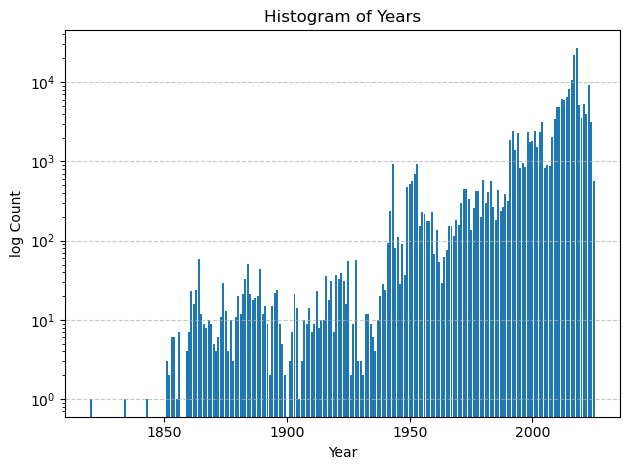

In [8]:
import matplotlib.pyplot as plt
# Count occurrences of each year
year_counts = species_df['year'].value_counts().sort_index()

# Plot as a bar chart
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values, width=0.8, align='center')  # width<1 to avoid overlap

# Logarithmic y-axis
ax.set_yscale('log')

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('log Count')
ax.set_title('Histogram of Years')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### GBIF reprojection and rasterization of the data

The GBIF data itself is not yet in a format that is compatible with remote sensing data and as such we will need to reproject it and bring it to a shared raster with other data

## CHELSA

In [4]:
from rasterio.env import Env


False


In [1]:
import sys

from pathlib import Path

# Add the src directory to sys.path
sys.path.append(str(Path().resolve().parents[1] / "src"))

from utils.chelsa import extract_param
from cube import chelsa

chelsa_cube = chelsa.chelsa_cube()
#chelsa_month_param = extract_param.read_chelsa_month_param("prototype_param.yaml", "../../config")

In [2]:
chelsa_cube

In [3]:
chelsa_cube_layer_names, chelsa_cube_layers= chelsa_cube.generate_chelsa_cube("prototype_param.yaml", "../../config")

-----Retrieving monthly CHELSA data for variable 'clt'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.52item/s]


-----Retrieving monthly CHELSA data for variable 'cmi'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.42item/s]


-----Retrieving monthly CHELSA data for variable 'hurs'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.60item/s]


-----Retrieving monthly CHELSA data for variable 'pet'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.45item/s]


-----Retrieving monthly CHELSA data for variable 'pr'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.56item/s]


-----Retrieving monthly CHELSA data for variable 'rsds'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.53item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.42item/s]


-----Retrieving monthly CHELSA data for variable 'tas'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.71item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.61item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.67item/s]


-----Retrieving monthly CHELSA data for variable 'vpd'-----


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.59item/s]


-----Retrieving Reference Climatology CHELSA data for variable 'ai' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio10' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio11' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio12' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio13' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio14' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio15' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio16' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio17' in reference

Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'cmi' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'hurs' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'pet' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'pr' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.14item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'rsds' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.27item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'sfcWind' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tas' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmax' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.21item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmin' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.17item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'vpd' in reference period 1981-2010-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.18item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio10'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio11'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio12'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.50item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio13'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.53item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio14'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.83item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio15'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.75item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio16'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.51item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio17'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.59item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio18'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.47item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio19'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.60item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio1'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio2'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio3'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.43item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio4'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.66item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio6'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio7'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.71item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio8'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.70item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio9'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'fcf'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'fgd'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd0'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.51item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd10'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.54item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.51item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd0'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd10'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd0'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd10'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.74item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.89item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gsl'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.73item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gsp'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.53item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gst'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg0'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.70item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg1'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.89item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg2'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.74item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg3'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.85item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg4'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'lgd'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.50item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd0'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd10'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.74item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd5'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.75item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'npp'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.65item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'scd'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'swe'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'pr'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.24item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tas'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:26<00:00,  3.33s/item]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmax'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:09<00:00,  1.17s/item]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmin'-----


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:10<00:00,  1.29s/item]


In [4]:
chelsa_cube_layer_names

['chelsa_month',
 'chelsa_clim_ref_period',
 'chelsa_clim_ref_month',
 'chelsa_clim_sim_period',
 'chelsa_clim_sim_month']

In [5]:
chelsa_cube_layers

[<xarray.Dataset> Size: 686kB
 Dimensions:  (time: 12, lat: 23, long: 69)
 Coordinates:
   * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
   * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
   * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
 Data variables:
     clt      (time, lat, long) float64 152kB 5.152e+03 5.152e+03 ... 5.758e+03
     cmi      (time, lat, long) int16 38kB 333 308 289 300 ... 598 592 579 575
     hurs     (time, lat, long) uint16 38kB 6867 6870 6873 ... 7139 7147 7156
     pet      (time, lat, long) uint16 38kB 1532 1793 1985 ... 2398 2577 2664
     pr       (time, lat, long) int32 76kB 4864 4869 4876 4893 ... 8316 8364 8418
     rsds     (time, lat, long) uint16 38kB 3080 3092 3110 ... 2246 2238 2229
     sfcWind  (time, lat, long) uint16 38kB 3666 4099 4332 ... 6001 6363 6586
     tas      (time, lat, long) int32 76kB 2740 2740 2740 2740 ... 2756 2756 2756
     tasmax   (time, lat,

In [4]:
layers = {"static":[chelsa_cube_layers[0]], "dynamic":chelsa_cube_layers[1:]}
layer_names = {"static":[chelsa_cube_layer_names[0]], "dynamic":chelsa_cube_layer_names[1:]}

In [7]:
import os

In [16]:
def export_layers(cube_name, engine, cube_path=""):
        #Catch invalid engine options
        if engine not in ["netcdf", "zarr"]:
            raise ValueError(f"{engine} is not a valid option. Please use one of the following ['netcdf', 'zarr']")
        out_dir = os.path.join(cube_path, cube_name)
        os.makedirs(out_dir, exist_ok=True)
        #Iterate over both dictionairies in the same way
        for (group, datasets), (group, names) in zip(layers.items(), layer_names.items()):
            group_path = os.path.join(out_dir, group)
            os.makedirs(group_path, exist_ok=True)
            for name, ds in zip(names, datasets):
                file_name = cube_name+"_"+name
                file_path = os.path.join(group_path, file_name)
                if engine=="netcdf":
                    file_path+=".nc"
                    ds.to_netcdf(file_path, mode="w", format="NETCDF4")
                if engine=="zarr":
                    file_path+=".zarr"
                    ds.to_zarr(file_path, "w")

In [17]:
export_layers("test_nc", "netcdf")
export_layers("test_zarr", "zarr")

In [31]:
#Get the key, value pairs
for (group, datasets), (group, names) in zip(layers.items(), layer_names.items()):
    group_path = os.path.join("", group)
    for name, ds in zip(names, datasets):
        file_name = cube_name+"_"+name
                file_path = os.path.join(group_path, file_name)
                if engine=="netcdf":
                    file_path+=".nc"
                    ds.to_netcdf(file_path, format="NETCDF4")
                if engine=="zarr":
                    file_path+=".zarr"
                    ds.to_zarr(file_path, "w")

static
chelsa_month
<xarray.Dataset> Size: 686kB
Dimensions:  (time: 12, lat: 23, long: 69)
Coordinates:
  * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
  * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
  * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
Data variables:
    clt      (time, lat, long) float64 152kB 5.152e+03 5.152e+03 ... 5.758e+03
    cmi      (time, lat, long) int16 38kB 333 308 289 300 ... 598 592 579 575
    hurs     (time, lat, long) uint16 38kB 6867 6870 6873 ... 7139 7147 7156
    pet      (time, lat, long) uint16 38kB 1532 1793 1985 ... 2398 2577 2664
    pr       (time, lat, long) int32 76kB 4864 4869 4876 4893 ... 8316 8364 8418
    rsds     (time, lat, long) uint16 38kB 3080 3092 3110 ... 2246 2238 2229
    sfcWind  (time, lat, long) uint16 38kB 3666 4099 4332 ... 6001 6363 6586
    tas      (time, lat, long) int32 76kB 2740 2740 2740 2740 ... 2756 2756 2756
    tasmax   (time, 

In [33]:
import cftime

In [37]:
def import_layers(cube_name: str, cube_path: str = ""):
    """
    Walks cube_name/<group>/<cube_name>_<layer>.nc  
    and returns two dicts:
      - layers[group]     = list of Datasets
      - layer_names[group] = corresponding list of layer keys
    """

    # Build and validate root folder
    root = os.path.join(cube_path, cube_name)
    if not os.path.isdir(root):
        raise FileNotFoundError(f"No folder at {root!r}")
    layers = {}
    layer_names = {}
    # Iterate over subfolders (groups)
    for group in sorted(os.listdir(root)):
        gdir = os.path.join(root, group)
        if not os.path.isdir(gdir):
            continue
        layers[group] = []
        layer_names[group] = []
        # Iterate over files in each group
        for fname in sorted(os.listdir(gdir)):
            base, ext = os.path.splitext(fname)
            prefix = f"{cube_name}_"
            # Skip non-NetCDF or wrong prefix
            if ext.lower() != ".nc" or not base.startswith(prefix):
                continue
            key = base[len(prefix):]
            full = os.path.join(gdir, fname)
            # Open NetCDF
            ds = xr.open_dataset(full,engine="netcdf4",decode_cf=True,decode_times=True,use_cftime=True)

            layer_names[group].append(key)
            layers[group].append(ds)
    return layers, layer_names

In [38]:
import xarray as xr
import numpy as np
test_ilayers, test_ilayer_names = import_layers("test_nc")

In [39]:
test_ilayers

{'dynamic': [<xarray.Dataset> Size: 90kB
  Dimensions:  (months: 2, lat: 23, long: 69)
  Coordinates:
    * months   (months) int64 16B 1 2
    * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
    * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
  Data variables:
      clt      (months, lat, long) float64 25kB ...
      cmi      (months, lat, long) int16 6kB ...
      hurs     (months, lat, long) uint16 6kB ...
      pet      (months, lat, long) uint16 6kB ...
      pr       (months, lat, long) uint16 6kB ...
      rsds     (months, lat, long) uint16 6kB ...
      sfcWind  (months, lat, long) uint16 6kB ...
      tas      (months, lat, long) uint16 6kB ...
      tasmax   (months, lat, long) uint16 6kB ...
      tasmin   (months, lat, long) uint16 6kB ...
      vpd      (months, lat, long) uint16 6kB ...,
  <xarray.Dataset> Size: 299kB
  Dimensions:           (lat: 23, long: 69)
  Coordinates:
    * lat               (lat) float64 18

In [22]:
test_ilayer_names

{'dynamic': ['chelsa_clim_ref_month',
  'chelsa_clim_ref_period',
  'chelsa_clim_sim_month',
  'chelsa_clim_sim_period'],
 'static': ['chelsa_month']}

In [32]:
test_ilayers["static"][0]

<xarray.Dataset> Size: 686kB
Dimensions:  (time: 12, lat: 23, long: 69)
Coordinates:
  * time     (time) object 96B 1980-01-01 00:00:00 ... 1980-12-01 00:00:00
  * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
  * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
Data variables:
    clt      (time, lat, long) float64 152kB ...
    cmi      (time, lat, long) int16 38kB ...
    hurs     (time, lat, long) uint16 38kB ...
    pet      (time, lat, long) uint16 38kB ...
    pr       (time, lat, long) int32 76kB ...
    rsds     (time, lat, long) uint16 38kB ...
    sfcWind  (time, lat, long) uint16 38kB ...
    tas      (time, lat, long) int32 76kB ...
    tasmax   (time, lat, long) int32 76kB ...
    tasmin   (time, lat, long) int32 76kB ...
    vpd      (time, lat, long) uint16 38kB ...

In [2]:
import sys

from pathlib import Path

# Add the src directory to sys.path
sys.path.append(str(Path().resolve().parents[1] / "src"))

from utils.chelsa import extract_param
from cube import bmd

bmd_cube = bmd.bmd_cube()

In [3]:
bmd_cube

In [4]:
bmd_cube.generate_bmd_data("prototype_param.yaml", "../../config")

-----Retrieving monthly CHELSA data for variable 'clt'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.38s/item]


-----Retrieving monthly CHELSA data for variable 'cmi'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:20<00:00, 10.30s/item]


-----Retrieving monthly CHELSA data for variable 'hurs'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62item/s]


-----Retrieving monthly CHELSA data for variable 'pet'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71item/s]


-----Retrieving monthly CHELSA data for variable 'pr'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.29item/s]


-----Retrieving monthly CHELSA data for variable 'rsds'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.87item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71item/s]


-----Retrieving monthly CHELSA data for variable 'tas'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.06item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.98item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.61item/s]


-----Retrieving monthly CHELSA data for variable 'vpd'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77item/s]


-----Retrieving Reference Climatology CHELSA data for variable 'bio1' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio2' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio3' in reference period 1981-2010-----
Complete
-----Retrieving monthly Reference Climatology CHELSA data for variable 'tas' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:20<00:00, 10.34s/item]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmin' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/item]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmax' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.30item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio1'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio2'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.85item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio3'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.53item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tas'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:35<00:00,  4.38s/item]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmin'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:25<00:00, 10.66s/item]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmax'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:29<00:00,  3.64s/item]

['chelsa_month', 'chelsa_clim_ref_period', 'chelsa_clim_ref_month', 'chelsa_clim_sim_period', 'chelsa_clim_sim_month']
[<xarray.Dataset> Size: 115kB
Dimensions:  (time: 2, lat: 23, long: 69)
Coordinates:
  * time     (time) datetime64[ns] 16B 1980-01-01 1980-02-01
  * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
  * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
Data variables:
    clt      (time, lat, long) float64 25kB 5.152e+03 5.152e+03 ... 6.412e+03
    cmi      (time, lat, long) int16 6kB 333 308 289 300 306 ... 249 241 228 224
    hurs     (time, lat, long) uint16 6kB 6867 6870 6873 6879 ... 6713 6723 6733
    pet      (time, lat, long) uint16 6kB 1532 1793 1985 1893 ... 3120 3287 3359
    pr       (time, lat, long) int32 13kB 4864 4869 4876 4893 ... 5527 5562 5597
    rsds     (time, lat, long) uint16 6kB 3080 3092 3110 3127 ... 4931 4907 4884
    sfcWind  (time, lat, long) uint16 6kB 3666 4099 4332 4219 ... 4397 4661 4824

In [5]:
bmd_cube.groups

{'static': [<xarray.Dataset> Size: 13kB
  Dimensions:  (lat: 23, long: 69)
  Coordinates:
    * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
    * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
  Data variables:
      bio1     (lat, long) uint16 3kB 2837 2837 2837 2836 ... 2832 2832 2832 2831
      bio2     (lat, long) uint16 3kB 71 71 71 71 71 71 71 ... 71 71 71 71 71 71
      bio3     (lat, long) float32 6kB 3.3 3.3 3.3 3.29 ... 3.27 3.27 3.27 3.26,
  <xarray.Dataset> Size: 39kB
  Dimensions:  (months: 2, lat: 23, long: 69)
  Coordinates:
    * months   (months) int64 16B 1 2
    * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
    * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
  Data variables:
      tas      (months, lat, long) float64 25kB 2.766e+03 2.766e+03 ... 2.763e+03
      tasmin   (months, lat, long) uint16 6kB 2740 2740 2740 ... 2734 2733 2733
      tasmax   (mon

In [6]:
bmd_cube.group_names

{'static': ['chelsa_clim_ref_period',
  'chelsa_clim_ref_month',
  'chelsa_clim_sim_period',
  'chelsa_clim_sim_month'],
 'dynamic': ['chelsa_month']}

In [7]:
bmd_cube.export_datatree("bmd_test_dt", "test_dt_export")
bmd_cube.export_group("bmd_test_layers", "test_layers_export")

In [8]:
bmd_cube.groups

{'static': [<xarray.Dataset> Size: 13kB
  Dimensions:  (lat: 23, long: 69)
  Coordinates:
    * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
    * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
  Data variables:
      bio1     (lat, long) uint16 3kB 2837 2837 2837 2836 ... 2832 2832 2832 2831
      bio2     (lat, long) uint16 3kB 71 71 71 71 71 71 71 ... 71 71 71 71 71 71
      bio3     (lat, long) float32 6kB 3.3 3.3 3.3 3.29 ... 3.27 3.27 3.27 3.26,
  <xarray.Dataset> Size: 39kB
  Dimensions:  (months: 2, lat: 23, long: 69)
  Coordinates:
    * months   (months) int64 16B 1 2
    * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
    * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
  Data variables:
      tas      (months, lat, long) float64 25kB 2.766e+03 2.766e+03 ... 2.763e+03
      tasmin   (months, lat, long) uint16 6kB 2740 2740 2740 ... 2734 2733 2733
      tasmax   (mon

In [6]:
ls test_dt_export/

Invalid switch - "".


In [9]:
import xarray as xr
from datatree import open_datatree

test_tree = open_datatree("test_dt_export/bmd_test_dt.nc")

In [10]:
print(test_tree)

DataTree('None', parent=None)
├── DataTree('static')
│   ├── DataTree('chelsa_clim_ref_period')
│   │       Dimensions:  (lat: 23, long: 69)
│   │       Coordinates:
│   │         * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
│   │         * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
│   │       Data variables:
│   │           bio1     (lat, long) uint16 3kB ...
│   │           bio2     (lat, long) uint16 3kB ...
│   │           bio3     (lat, long) float32 6kB ...
│   ├── DataTree('chelsa_clim_ref_month')
│   │       Dimensions:  (months: 2, lat: 23, long: 69)
│   │       Coordinates:
│   │         * months   (months) int64 16B 1 2
│   │         * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
│   │         * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
│   │       Data variables:
│   │           tas      (months, lat, long) float64 25kB ...
│   │           tasmin   (mo